# **Preparing**

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats 
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **Basic Statistic and Visualizations**

 ***For the "Median value of owner-occupied homes" provide a boxplot***

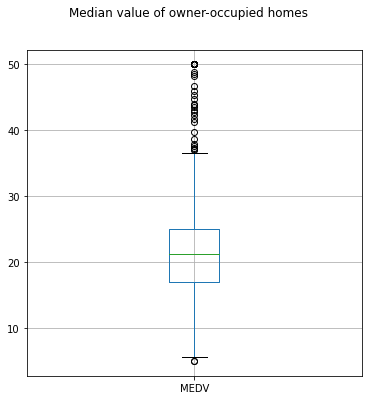

In [ ]:
boxPlot = boston_df.boxplot(column=['MEDV'], figsize=(6,6))
fig = np.asarray(boxPlot).reshape(-1)[0].get_figure()
fig.suptitle('Median value of owner-occupied homes')
plt.show()

***Provide a  bar plot for the Charles river variable***

Text(0, 0.5, 'Total')

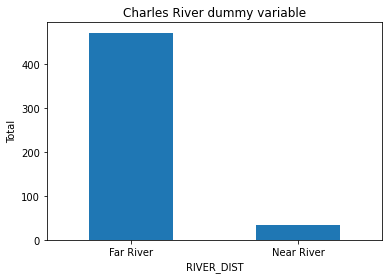

In [ ]:
boston_df["RIVER_DIST"] = boston_df["CHAS"].map(lambda x: "Near River" if x == 1 else "Far River")
count_value = boston_df["RIVER_DIST"].value_counts()
count_df = pd.DataFrame(count_value)
count_df['RIVER_DIST'].plot(kind= 'bar')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Charles River dummy variable")
plt.xlabel("RIVER_DIST")
plt.ylabel("Total")

***Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)***

[Text(0.5, 1.0, 'AGE_CAT box plot')]

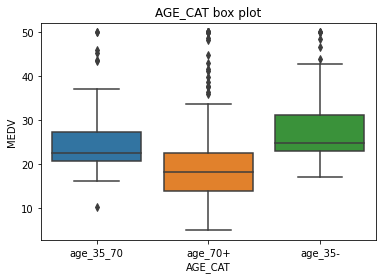

In [ ]:
boston_df["AGE_CAT"] = boston_df["AGE"].map(lambda x:"age_35-" if x<=35 else "age_35_70" if x<=70 else "age_70+")
sns.boxplot(x="AGE_CAT",y="MEDV",data=boston_df).set(title='AGE_CAT box plot')

***Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?***

[Text(0.5, 1.0, 'NOX~INDUS scatter plot')]

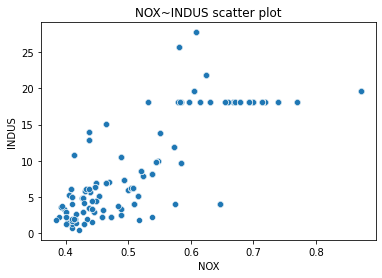

In [ ]:
sns.scatterplot(x="NOX",y="INDUS",data=boston_df).set(title='NOX~INDUS scatter plot')

it is a positive correlation about NOX and INDUS -> The higher Nitric oxide concentrations, the less economical price

***Create a histogram for the pupil to teacher ratio variable***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'PTRATIO histogram plot')]

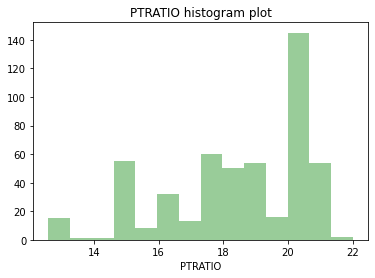

In [ ]:
sns.distplot(boston_df['PTRATIO'], color='green', kde=False).set(title='PTRATIO histogram plot')

-----------------------------

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [ ]:
t,p = scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

equal_var = True if p>0.05 else False

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = equal_var)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

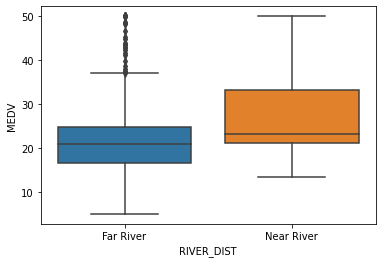

In [ ]:
sns.boxplot(x="RIVER_DIST",y="MEDV",data=boston_df)

* **Conclusion**: The mean price of houses in the nearby river area is ***differrent*** to the one in further areas.

-----------------------------

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [ ]:

under_35 = boston_df.loc[boston_df["AGE"]<35]["MEDV"]
from_35_to_70 = boston_df.loc[(boston_df["AGE"]<=35) & (boston_df["AGE"]<70)]["MEDV"]
over_70 = boston_df.loc[boston_df["AGE"]>=70]["MEDV"]

t,p = scipy.stats.levene(under_35,
                   from_35_to_70, 
                   over_70, 
                   center='mean')
print(t,p)
equal_var = True if p>0.05 else False

if equal_var is True:
  f_statistic, p_value = scipy.stats.f_oneway(under_35, 
                                              from_35_to_70, 
                                              over_70
                                             )
  print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
else:
  print("STD are not equal to each other. Therefore cannot use ANOVA test")

0.8513297432198562 0.4275097271338768
F_Statistic: 45.43036893270929, P-Value: 9.439763953174224e-19


**Conclusion**: Since there is an equal for STD. Therefore, we can trust the result of ANOVA test P-Value, which is much smaller than 0.05--> there is at least one difference between means of 3 age groups.

-----------------------------

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [ ]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion** Since P-value<<0.05. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town 

-----------------------------

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [ ]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        07:08:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion** Because P-value = 0 --> there is a positive relationship between distance and median value